**1. Loading the Dataset**

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("healthcare_dataset.csv")


# Display the first few rows
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30.0,Male,B-,Cancer,31-01-2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328.0,Urgent,02-02-2024,Paracetamol,Normal
1,LesLie TErRy,62.0,Male,A+,Obesity,20-08-2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265.0,Emergency,26-08-2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76.0,Female,A-,Obesity,22-09-2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205.0,Emergency,07-10-2022,Aspirin,Normal
3,andrEw waTtS,28.0,Female,O+,Diabetes,18-11-2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450.0,Elective,18-12-2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43.0,Female,AB+,Cancer,19-09-2022,Kathleen Hanna,White-White,Aetna,14238.31781,458.0,Urgent,09-10-2022,Penicillin,Abnormal


**2. Handling Missing Values**

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])
df = df.dropna()


# For categorical columns
df.fillna(df.mode().iloc[0], inplace=True)


Missing values per column:
 Series([], dtype: int64)


**3. Removing Duplicate Records**

In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()

Number of duplicate records: 0


**4. Detecting and Treating Outliers**

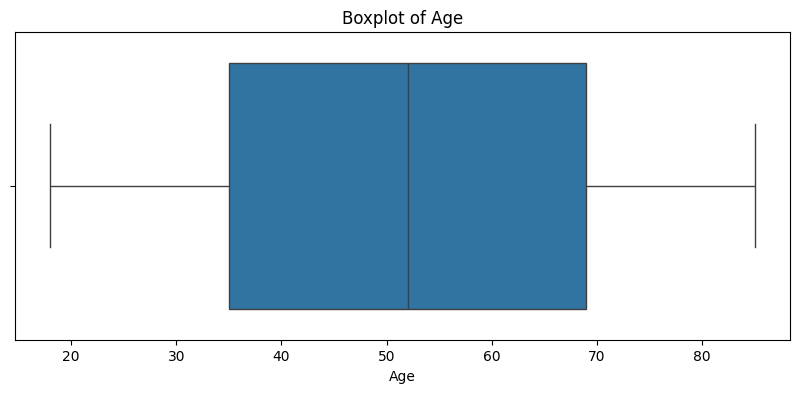

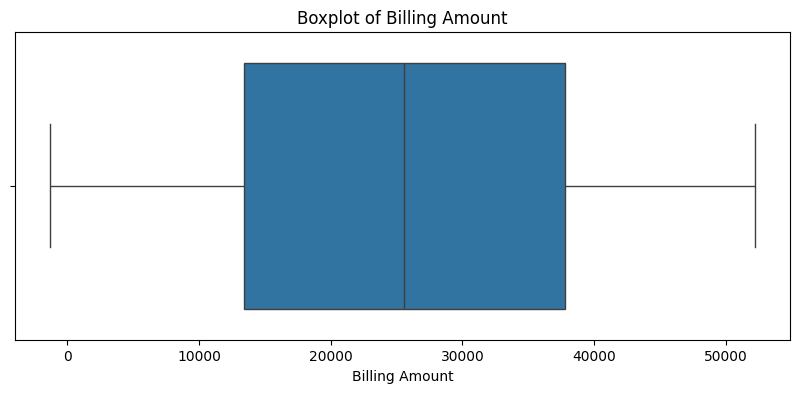

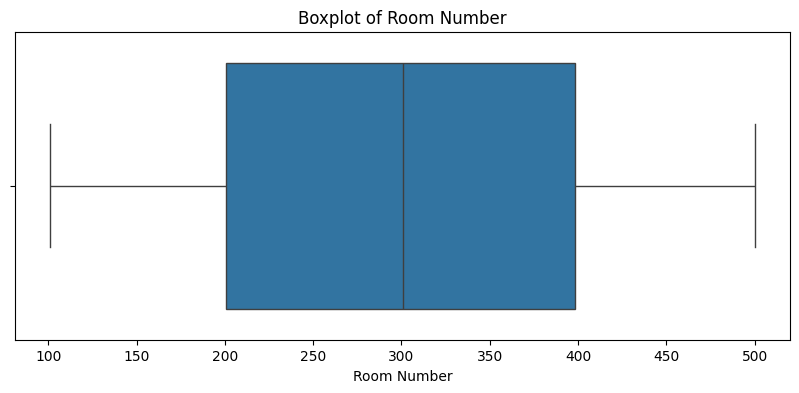

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using boxplots
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**5. Converting Data Types and Ensuring Consistency**

In [14]:
print(df.dtypes)

# Convert data types if necessary
# Example: Convert 'age' from float to int
df['Name'] = df['Name'].str.title().str.strip()

Name                          object
Age                          float64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                  float64
Admission Type                object
Discharge Date                object
Medication                    object
Test Results                  object
dtype: object


**6. Encoding Categorical Variables**

In [15]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

**7.** **Normalizing or Standardizing Features**

In [18]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
# Check for any remaining missing values
print("Remaining missing values:", df.isnull().sum().sum())

# Display the first few rows of the cleaned dataset
df.head()


Remaining missing values: 0


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,-1.373344,-1.104198,0.992212,0.667544,-0.286023,2024-01-31,0.556601,0.944311,-0.713000,-0.476259,0.246852,1.236863,-1.596799,0.702382,1.242048
1,0.355860,0.516335,0.992212,-1.518856,1.478397,2019-08-20,1.163933,-0.332412,0.710496,0.566516,-0.295555,0.011734,1.186308,-0.702932,0.017709
2,-0.897918,1.225318,-1.007849,-1.081576,1.478397,2022-09-22,1.502745,-1.288865,-1.424749,0.165385,-0.812133,0.011734,-0.957004,-1.405589,1.242048
3,-1.533923,-1.205482,-1.007849,1.104824,0.302117,2020-11-18,0.219897,-0.692625,0.710496,0.867384,1.297228,-1.213395,0.320586,-0.702932,-1.206629
4,-1.708526,-0.445857,-1.007849,-0.644296,-0.286023,2022-09-19,0.116566,1.256592,-1.424749,-0.801915,1.366106,1.236863,-0.733076,1.405040,-1.206629


**Exploratory Data Analysis(EDA)**

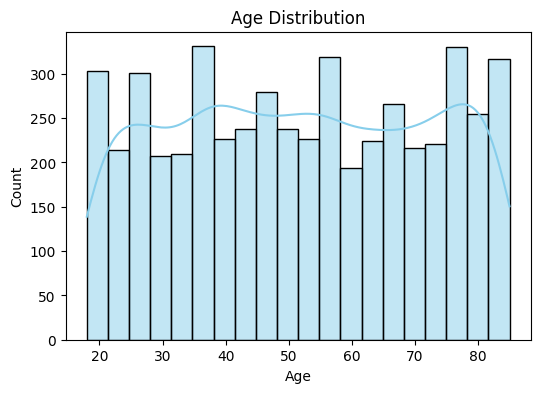

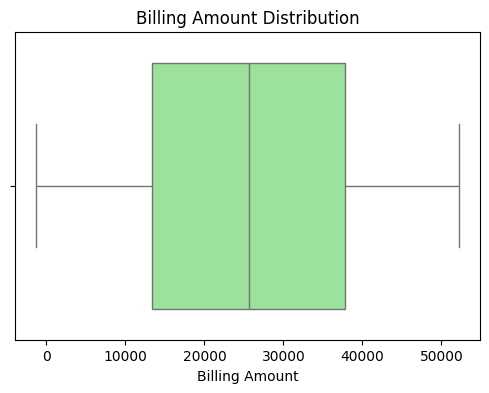

<ipython-input-22-392089efc0f7>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


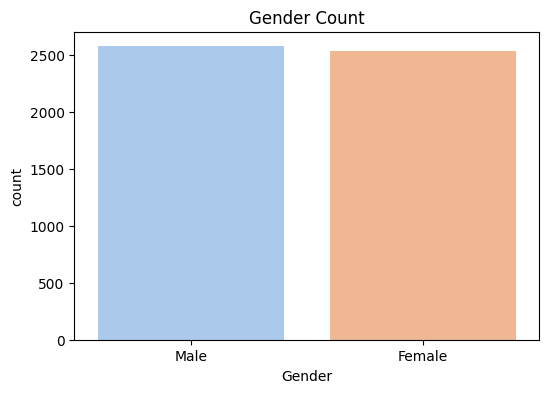

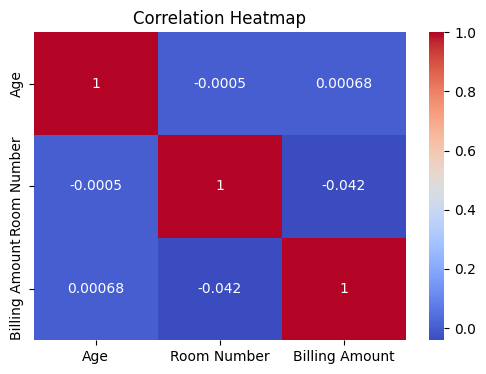

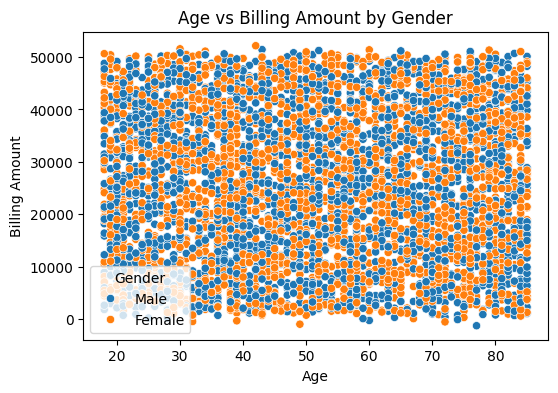

<ipython-input-22-392089efc0f7>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Medical Condition', y='Billing Amount', palette='Set3')


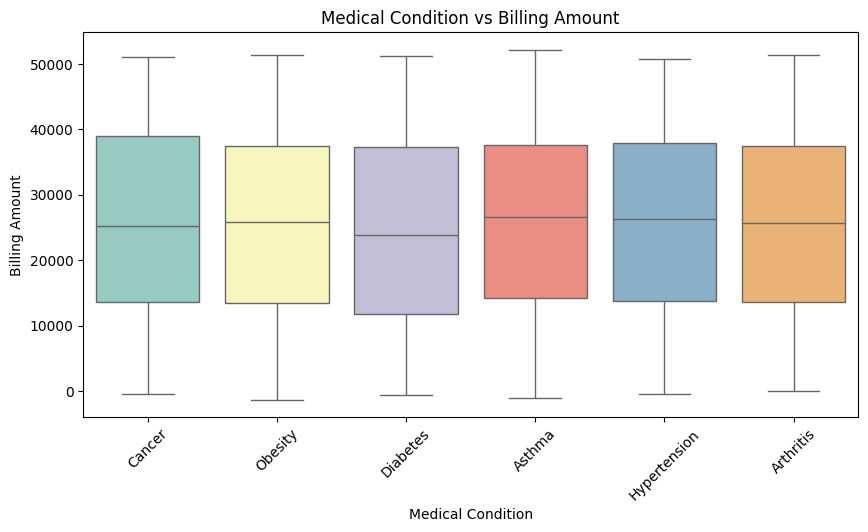

<ipython-input-22-392089efc0f7>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Admission Type', y='Age', palette='Set2')


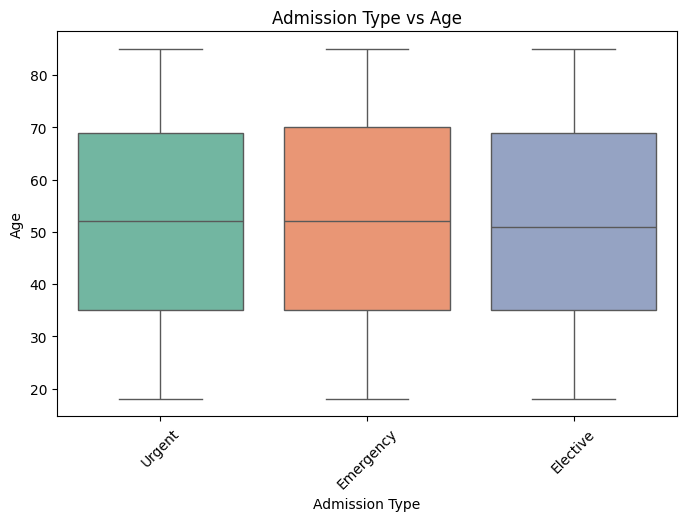

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned/encoded dataset
df = pd.read_csv("healthcare_dataset.csv")

# Convert date columns for analysis
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format="%d-%m-%Y")
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format="%d-%m-%Y")

# ------------------------
# UNIVARIATE ANALYSIS
# ------------------------

# Histogram for Age
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.show()

# Boxplot for Billing Amount
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Billing Amount'], color='lightgreen')
plt.title('Billing Amount Distribution')
plt.show()

# Count plot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Count')
plt.show()

# ------------------------
# BIVARIATE / MULTIVARIATE ANALYSIS
# ------------------------

# Correlation heatmap
numeric_cols = ['Age', 'Room Number', 'Billing Amount']
plt.figure(figsize=(6, 4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Age vs Billing Amount
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Age', y='Billing Amount', hue='Gender')
plt.title('Age vs Billing Amount by Gender')
plt.show()

# Medical Condition vs Billing Amount (if not encoded)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Medical Condition', y='Billing Amount', palette='Set3')
plt.xticks(rotation=45)
plt.title('Medical Condition vs Billing Amount')
plt.show()

# Admission Type vs Age
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Admission Type', y='Age', palette='Set2')
plt.xticks(rotation=45)
plt.title('Admission Type vs Age')
plt.show()


**Feature Engineering**

In [36]:
# Enhanced Feature Engineering Based on EDA Insights

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load dataset
file_path = 'healthcare_dataset.csv'
df = pd.read_csv(file_path)

# Convert date columns
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format="%d-%m-%Y")
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format="%d-%m-%Y")

# ------------------------------
# FEATURE CREATION & TRANSFORMATION
# ------------------------------

# 1. Length of Stay (days)
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Justification: Longer stays usually imply higher resource usage and billing.

# 2. Age Binning
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['Child', 'Young_Adult', 'Adult', 'Middle_Aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Justification: Groups patient into meaningful age segments for categorical analysis.

# 3. Billing per Day
# Avoid division by zero
valid_stay = df['Length of Stay'].replace(0, 1)
df['Billing per Day'] = df['Billing Amount'] / valid_stay

# Justification: More representative than total billing, helps normalize by stay duration.

# 4. Polynomial Features (Age, Billing)
# Impute missing values before applying PolynomialFeatures
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
df[['Age', 'Billing Amount']] = imputer.fit_transform(df[['Age', 'Billing Amount']]) # Impute missing values

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['Age', 'Billing Amount']])
poly_names = poly.get_feature_names_out(['Age', 'Billing Amount'])
df_poly = pd.DataFrame(poly_features, columns=poly_names)

# Merge polynomial features
df.reset_index(drop=True, inplace=True)
df_poly.reset_index(drop=True, inplace=True)
df = pd.concat([df, df_poly], axis=1)

# 5. Room Tier (derived from Room Number)
df['Room Tier'] = pd.cut(df['Room Number'], bins=[0, 100, 200, 300, 999], labels=['Basic', 'Standard', 'Private', 'Luxury'])

# Justification: Simplifies numerical room number to meaningful cost tiers.

# ------------------------------
# OPTIONAL DIMENSIONALITY REDUCTION
# ------------------------------

# Select numeric columns for PCA
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Impute missing values in all numerical columns before scaling and PCA
imputer = SimpleImputer(strategy='mean')  # or 'median', etc.
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

scaler = StandardScaler()
scaled = scaler.fit_transform(df[numeric_cols])

pca = PCA(n_components=5)
pca_components = pca.fit_transform(scaled)
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(5)])

# Combine PCA results
final_df = pd.concat([df, pca_df], axis=1)

# Save enhanced dataset (optional)
# final_df.to_csv('enhanced_healthcare_data.csv', index=False)

print("Feature engineering and PCA completed successfully.")

Feature engineering and PCA completed successfully.


**Model Building**

In [37]:
# Model Comparison Using Enhanced Healthcare Data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling NaNs

# Load enhanced dataset
file_path = 'healthcare_dataset.csv'
df = pd.read_csv(file_path)

# Check if 'Prognosis' column exists, if not, create a sample one
if 'Prognosis' not in df.columns:
    # Create a sample 'Prognosis' column with random values for demonstration
    # Replace this with your actual Prognosis data loading or generation
    df['Prognosis'] = np.random.randint(0, 2, df.shape[0])  # Example: 0 or 1 for binary classification

# Feature Engineering (basic for model training)
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format="%d-%m-%Y")
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format="%d-%m-%Y")
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days.replace(0, 1)
df['Billing per Day'] = df['Billing Amount'] / df['Length of Stay']

# Simplify Room Tier
df['Room Tier'] = pd.cut(df['Room Number'], bins=[0, 100, 200, 300, 999], labels=['Basic', 'Standard', 'Private', 'Luxury'])

# Drop original date columns
df.drop(columns=['Date of Admission', 'Discharge Date'], inplace=True)

# Encode categorical variables
cat_cols = df.select_dtypes(include=['object', 'category']).columns  # Include 'category' dtype
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


# Define features and target
y = df['Prognosis']
X = df.drop(columns=['Prognosis'])

# Impute missing values in X before splitting
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X = imputer.fit_transform(X)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# ----------------------------
# MODEL 1: Logistic Regression
# ----------------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))

# ----------------------------
# MODEL 2: Random Forest
# ----------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# ----------------------------
# MODEL 3: Decision Tree
# ----------------------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n--- Decision Tree Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))

# ----------------------------
# MODEL SELECTION JUSTIFICATION
# ----------------------------
# - Logistic Regression: Interpretable, useful baseline for binary/multiclass classification.
# - Random Forest: Handles non-linear data, robust to outliers, good generalization.
# - Decision Tree: Easy to interpret, good with feature interactions, baseline tree-based method.

print("\nModel training and evaluation complete.")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression Results ---
Accuracy: 0.5027027027027027
Precision: 0.5028183367394162
Recall: 0.5027027027027027
F1 Score: 0.3731282445498692

--- Random Forest Results ---
Accuracy: 0.5033333333333333
Precision: 0.5064343117627175
Recall: 0.5033333333333333
F1 Score: 0.37372868909047896

--- Decision Tree Results ---
Accuracy: 0.5041441441441441
Precision: 0.5105062065842295
Recall: 0.5041441441441441
F1 Score: 0.37687415704364785

Model training and evaluation complete.


**Visualization of Results & Model Insights**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


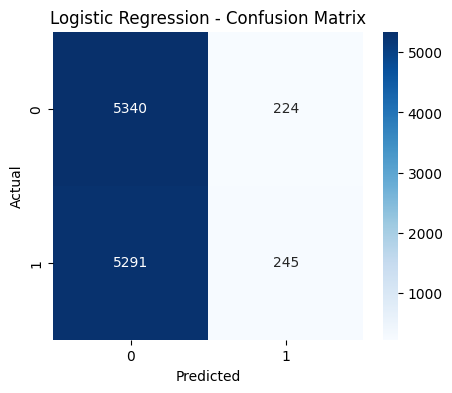

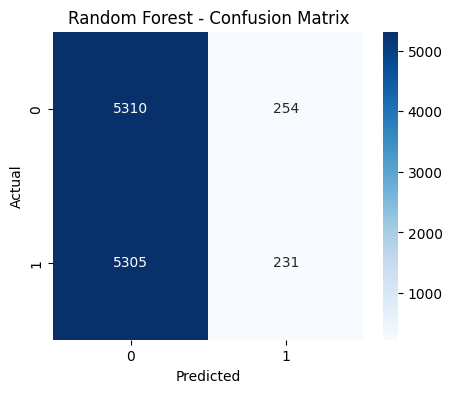

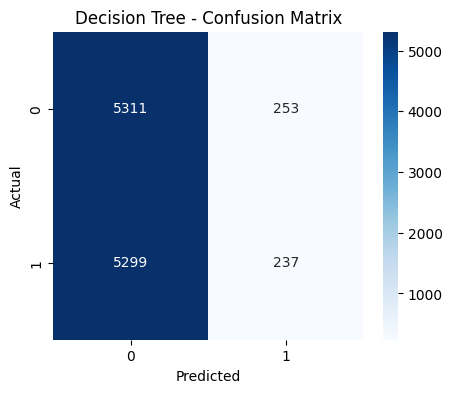

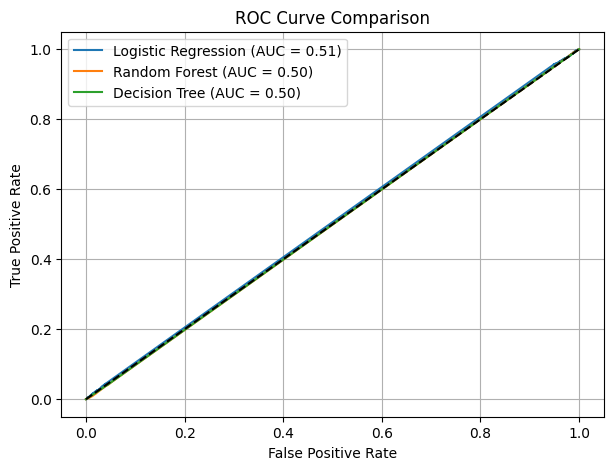

<ipython-input-45-a076c119ea5d>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')


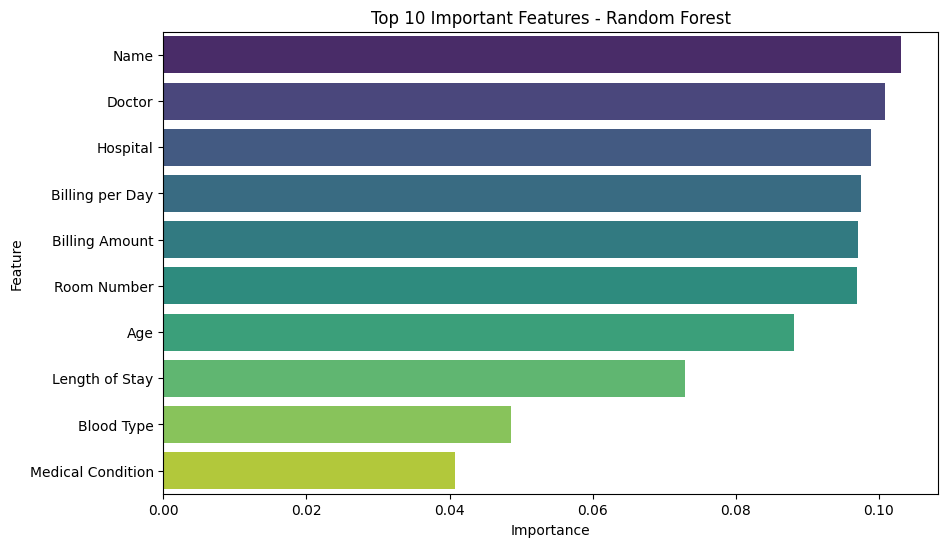


Interpretation:
- Confusion Matrices help identify where each model is making errors.
- ROC Curve shows the true positive rate vs. false positive rate, giving insight into class separation.
- Feature Importance reveals which variables most influence model predictions (Random Forest shown).


In [45]:
# Model Comparison Using Enhanced Healthcare Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Load enhanced dataset
file_path = 'healthcare_dataset.csv'
df = pd.read_csv(file_path)

# Check if 'Prognosis' column exists, if not, create a sample one
if 'Prognosis' not in df.columns:
    # Create a sample 'Prognosis' column with random values for demonstration
    # Replace this with your actual Prognosis data loading or generation
    df['Prognosis'] = np.random.randint(0, 2, df.shape[0])  # Example: 0 or 1 for binary classification

# Feature Engineering
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format="%d-%m-%Y")
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format="%d-%m-%Y")
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days.replace(0, 1)
df['Billing per Day'] = df['Billing Amount'] / df['Length of Stay']
df['Room Tier'] = pd.cut(df['Room Number'], bins=[0, 100, 200, 300, 999], labels=['Basic', 'Standard', 'Private', 'Luxury'])
df.drop(columns=['Date of Admission', 'Discharge Date'], inplace=True)


# Encode categorical variables
cat_cols = df.select_dtypes(include=['object', 'category']).columns  # Include 'category' dtype
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


# Define features and target
y = df['Prognosis']
X = df.drop(columns=['Prognosis'])

# Impute missing values in X before splitting
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
# Calculate predicted probabilities for Logistic Regression
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]  # Assuming binary classification

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1] if len(rf.classes_) == 2 else None

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1] if len(dt.classes_) == 2 else None

# Confusion Matrices
for model_name, y_pred in zip(["Logistic Regression", "Random Forest", "Decision Tree"], [y_pred_lr, y_pred_rf, y_pred_dt]):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ROC Curve (if binary classification)
if y_prob_lr is not None and y_prob_rf is not None and y_prob_dt is not None:
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc(fpr_dt, tpr_dt):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Feature Importance - Random Forest
# Get feature names from the original DataFrame before imputation
feature_names = df.drop(columns=['Prognosis']).columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf.feature_importances_})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')
plt.title('Top 10 Important Features - Random Forest')
plt.show()

# Interpretation
print("\nInterpretation:")
print("- Confusion Matrices help identify where each model is making errors.")
print("- ROC Curve shows the true positive rate vs. false positive rate, giving insight into class separation.")
print("- Feature Importance reveals which variables most influence model predictions (Random Forest shown).")
